In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv(r"C:\Users\munir\Downloads\internship projects/advertising.csv")


In [22]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [25]:
df.shape

(200, 4)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [27]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


2.Data Cleaning

In [28]:
df.isnull().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

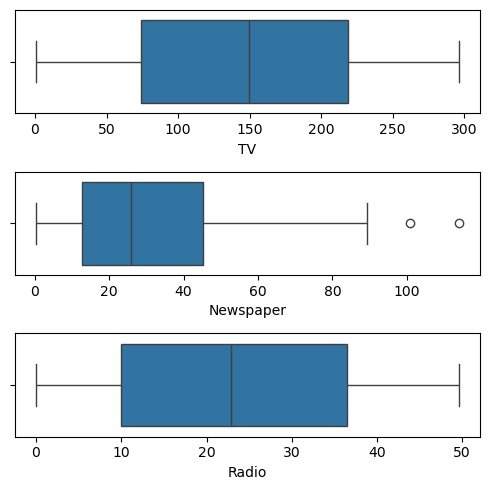

In [30]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(x=df['TV'], ax = axs[0])
plt2 = sns.boxplot(x=df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(x=df['Radio'], ax = axs[2])
plt.tight_layout()


3.Exploratory Data Analysis

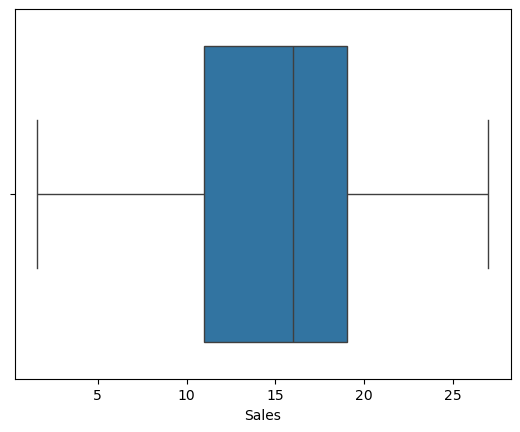

In [34]:
sns.boxplot(x= df['Sales'])
plt.show()


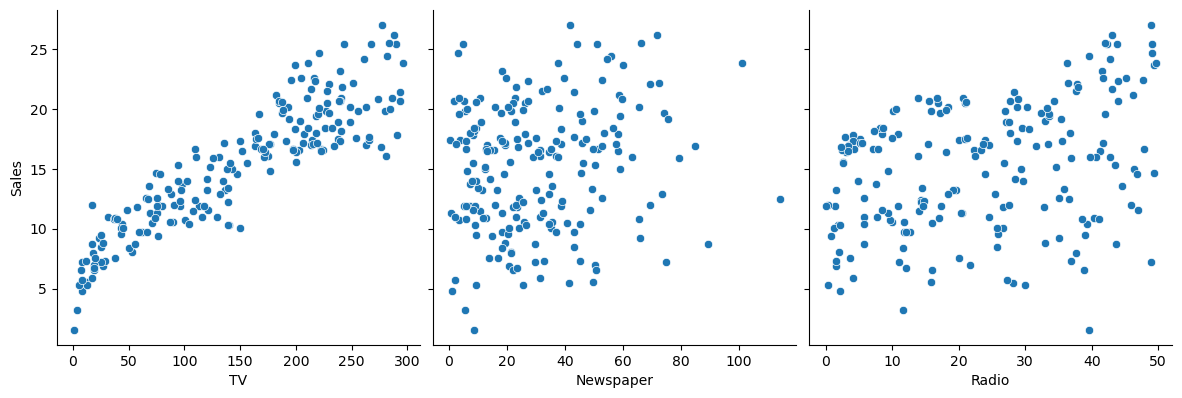

In [38]:
#create a pairplot to show relationships between 'TV', 'Newspaper', 'Radio',and 'Sales'
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars=['Sales'],height=4)
# Show the plot
plt.show()


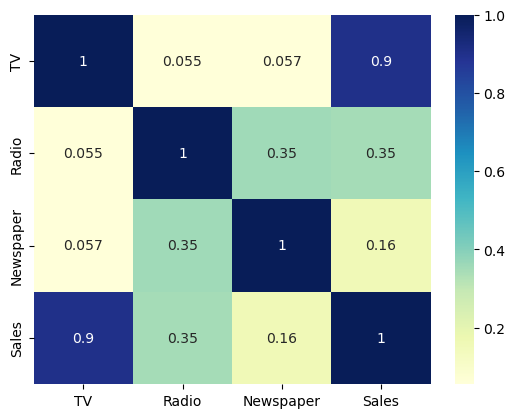

In [39]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

4.Model Building

In [44]:
x = df['TV']
y = df['Sales']


In [45]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7,test_size=0.3, random_state=42)


In [46]:
x_train.head()


169    284.3
97     184.9
31     112.9
12      23.8
35     290.7
Name: TV, dtype: float64

In [48]:
y_train.head()


169    20.0
97     20.5
31     11.9
12      9.2
35     17.8
Name: Sales, dtype: float64

5.Building a Linear Model


In [49]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()
lr.params


const    7.206555
TV       0.054835
dtype: float64

In [50]:
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     550.7
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           5.08e-50
Time:                        15:18:28   Log-Likelihood:                -314.94
No. Observations:                 140   AIC:                             633.9
Df Residuals:                     138   BIC:                             639.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2066      0.414     17.392      0.0

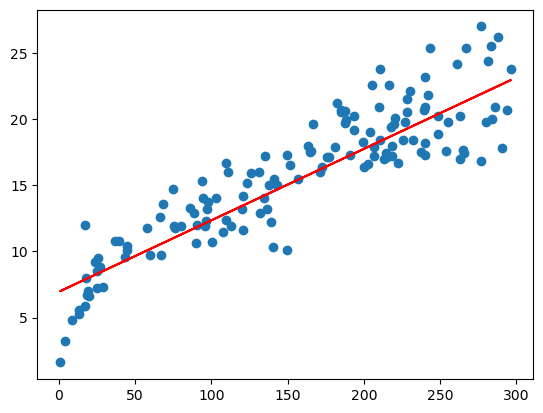

In [51]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()


6.Model Evaluation

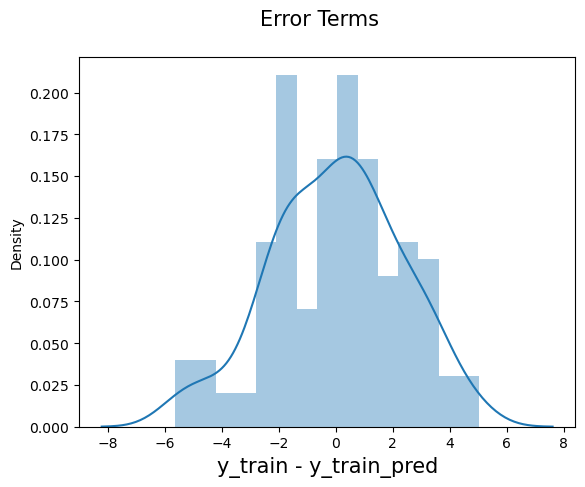

In [53]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)
fig = plt.figure()
sns.distplot(res, bins=15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

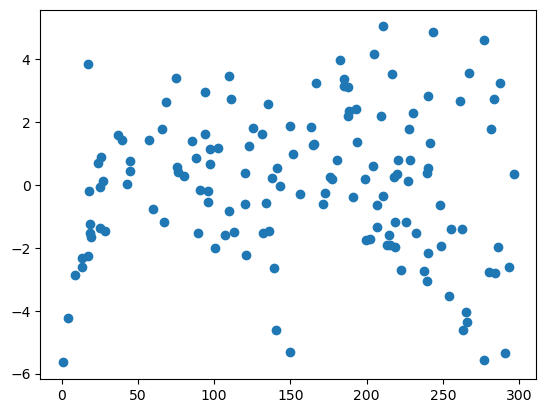

In [54]:
plt.scatter(x_train, res)
plt.show()


7.Prediction on the Test Set

In [55]:
x_test_sm = sm.add_constant(x_test)
y_pred = lr.predict(x_test_sm)
y_pred.head()

95     16.161091
15     17.921291
30     23.267692
158     7.848123
128    19.286679
dtype: float64

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
np.sqrt(mean_squared_error(y_test, y_pred))


2.27585706980176

In [57]:
# Checking the R-squared on the test set
r_squared = r2_score(y_test, y_pred)
r_squared


0.814855389208679

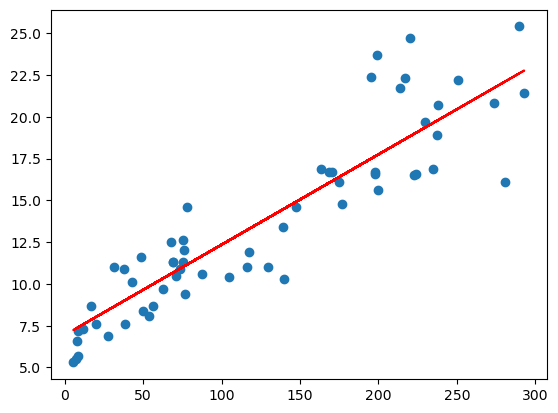

In [58]:
#Visvalizing the fit on the test set
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.948 + 0.054 * x_test, 'r')
plt.show()
